#Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.
#Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

In [35]:
import pandas as pd
df=pd.read_csv("exchange_rate.csv", index_col='date',parse_dates=True)
df.head(10)

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849
06-01-1990 00:00,0.7866
07-01-1990 00:00,0.7886
08-01-1990 00:00,0.7910
09-01-1990 00:00,0.7939


In [36]:
df.shape

(7588, 1)

In [37]:
df.columns

Index(['Ex_rate'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [39]:
df.isnull().sum()

,0
Ex_rate,0


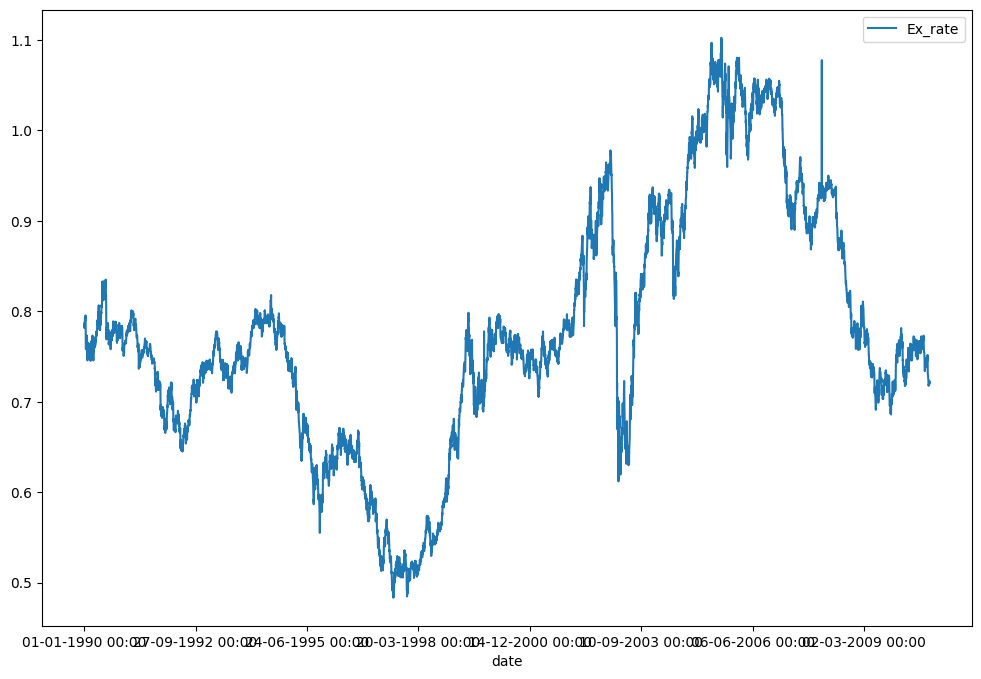

In [47]:
import matplotlib.pyplot as plt


df.plot(figsize=(12,8))
plt.legend(loc='best')
plt.show()


In [48]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [50]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. P-Value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4.No of Observations used for ADF regression and critical values calculation: ", dftest[3])
    print("5. Critical Values:", dftest[4])
    for key,val in dftest[4].items():
        print("\t",key,":",val)

In [53]:
ad_test(df["Ex_rate"])

1. ADF: -1.6649941807382342
2. P-Value: 0.4492327353597477
3. Num of Lags: 1
4.No of Observations used for ADF regression and critical values calculation:  7586
5. Critical Values: {'1%': np.float64(-3.4312123140180137), '5%': np.float64(-2.861921078147796), '10%': np.float64(-2.5669728434336108)}
	 1% : -3.4312123140180137
	 5% : -2.861921078147796
	 10% : -2.5669728434336108


In [55]:
import numpy as np
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(df["Ex_rate"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject